## Exploratory Data Analysis & Intro

### Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

### Final Delverables

* Create Jupyter Notebooks(showcasing core skills in Python).
* Create a summary page (via README.md) capturing your findings.
* Share this project via GitHub & Linkedin.

### Questions To Answer

1. What are the most demanded skills for the top 3 most populat data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts?

In [2]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Set Universal Theme
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

### Filter for US Data Science Roles

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

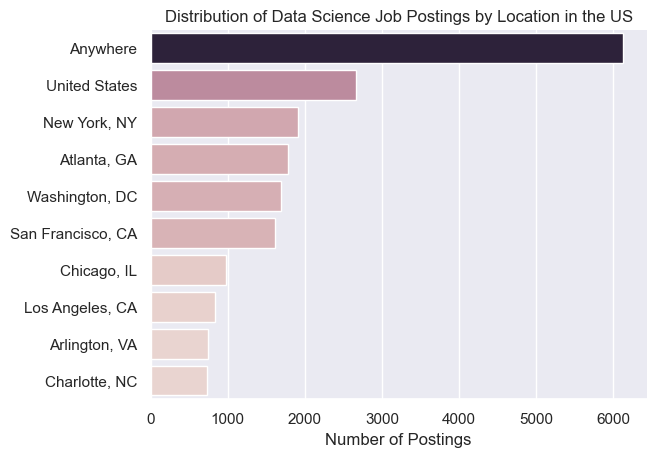

In [17]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', legend=False)
plt.ylabel('')
plt.xlabel('Number of Postings')
plt.title('Distribution of Data Science Job Postings by Location in the US')
sns.despine()
plt.show()

In [10]:
# Converting boolean values to Yes & No statements

df_DA_US['Remote'] = df_DA_US['job_work_from_home'].apply(lambda x: 'Yes' if x == True else 'No')
df_DA_US['Degree_mentioned'] = df_DA_US['job_no_degree_mention'].apply(lambda x: 'Yes' if x == True else 'No')
df_DA_US['Health_Insurance_Available'] = df_DA_US['job_health_insurance'].apply(lambda x: 'Yes' if x == True else 'No')

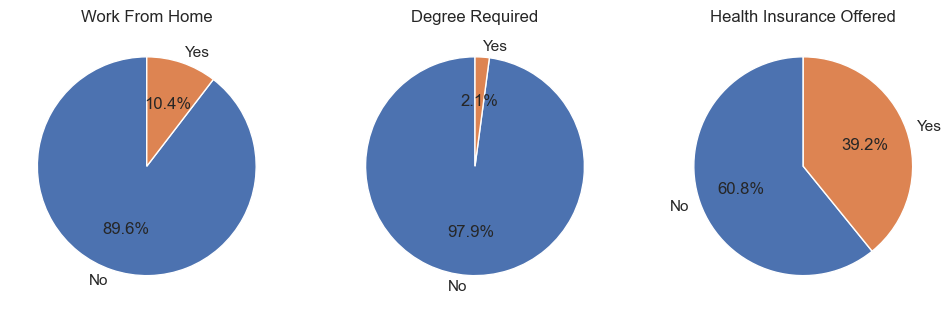

In [13]:

pie_dict = {
    'Remote': 'Work From Home',
    'Degree_mentioned': 'Degree Required',
    'Health_Insurance_Available': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3) # These specify the row and the column
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(pie_dict.items()):  # i specifies the index and since we are working with a dict, we have to put our keys and items in a tuple otherwise we would get an error
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['No', 'Yes'])
    ax[i].set_title(title)

plt.show()

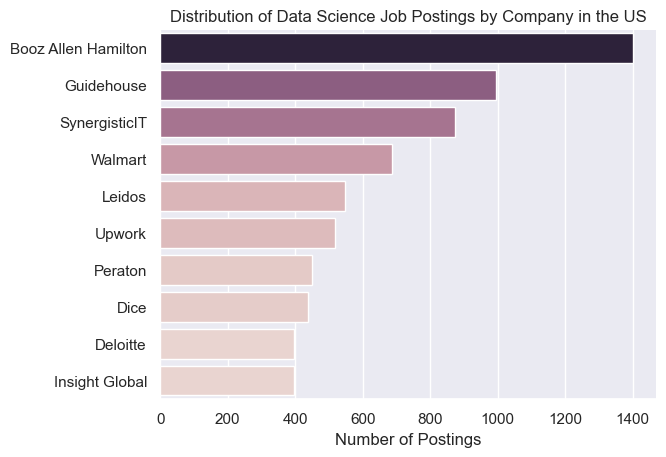

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', legend=False)
plt.ylabel('')
plt.xlabel('Number of Postings')
plt.title('Distribution of Data Science Job Postings by Company in the US')
sns.despine()
plt.show()